# Table of Content

1. Introduction
2. Setup and Import
3. Getting to know the Data
4. Visualisation


# Introduction

-> Picture

Success in any financial market requires one to identify solid investments. When a stock or derivative is undervalued, it makes sense to buy. If it's overvalued, perhaps it's time to sell. While these finance decisions were historically made manually by professionals, technology has ushered in new opportunities for retail investors. Data scientists, specifically, may be interested to explore quantitative trading, where decisions are executed programmatically based on predictions from trained models.

There are plenty of existing quantitative trading efforts used to analyze financial markets and formulate investment strategies. To create and execute such a strategy requires both historical and real-time data, which is difficult to obtain especially for retail investors. This competition will provide financial data for the Japanese market, allowing retail investors to analyze the market to the fullest extent.

Japan Exchange Group, Inc. (JPX) is a holding company operating one of the largest stock exchanges in the world, Tokyo Stock Exchange (TSE), and derivatives exchanges Osaka Exchange (OSE) and Tokyo Commodity Exchange (TOCOM). JPX is hosting this competition and is supported by AI technology company AlpacaJapan Co.,Ltd.

This competition on Kaggle will compare our final model against real future returns after the training phase is complete.



## Setup and Import

As always, the first step is to import the required libraries and data. Since we do not want to run the SQL query every time, we can simply import the csv file we created in the first notebook.

In [3]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import numpy as np

from ipywidgets import HTML
from io import BytesIO
import base64

import warnings
warnings.simplefilter("ignore")

# Turn off the max column width so the images won't be truncated
pd.set_option('display.max_colwidth', None)
 
# Turning off the max column will display all the data
# if gathering into sets / array we might want to restrict to a few items
pd.set_option('display.max_seq_items', 3)


In [4]:
# Import dataframes for Stock Prices
stock_df = pd.read_csv('../data/train_files/stock_prices.csv', parse_dates=['Date'])
fin_df = pd.read_csv('../data/train_files/financials.csv', parse_dates=['Date'])
opt_df = pd.read_csv('../data/train_files/options.csv', parse_dates=['Date'])
sec_df = pd.read_csv('../data/train_files/secondary_stock_prices.csv', parse_dates=['Date'])
tra_df = pd.read_csv('../data/train_files/trades.csv', parse_dates=['Date'])

stock_desc_df = pd.read_csv('../data/stock_price_spec.csv')
stock_list_desc_df = pd.read_csv('../data/stock_list_spec.csv')
stock_list_df = pd.read_csv('../data/stock_list.csv')

In [5]:
stock_df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   RowId             object        
 1   Date              datetime64[ns]
 2   SecuritiesCode    int64         
 3   Open              float64       
 4   High              float64       
 5   Low               float64       
 6   Close             float64       
 7   Volume            int64         
 8   AdjustmentFactor  float64       
 9   ExpectedDividend  float64       
 10  SupervisionFlag   bool          
 11  Target            float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [45]:
fin_df.head()

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.017010e+13,20170105_2659,2017-01-05,2659.0,2017-01-05,15:00:00,1.483596e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,285.05,NaN,False,True,False,False,False,31981654.0,18257,31963405.0
4,2.017011e+13,20170105_3050,2017-01-05,3050.0,2017-01-05,15:30:00,1.483598e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
opt_df.head()

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.4736,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.4736,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.4736,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.4736,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.4736,14.5932,0.0091,0.0,0.0


In [47]:
sec_df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1305,2017-01-04,1305,1594.0,1618.0,1594.0,1615.0,538190,1.0,NaN,False,-0.001855
1,20170104_1306,2017-01-04,1306,1575.0,1595.0,1573.0,1593.0,2494980,1.0,NaN,False,-0.000627
2,20170104_1308,2017-01-04,1308,1557.0,1580.0,1557.0,1578.0,526100,1.0,NaN,False,-0.001900
3,20170104_1309,2017-01-04,1309,28810.0,29000.0,28520.0,28780.0,403,1.0,NaN,False,0.005237
4,20170104_1311,2017-01-04,1311,717.0,735.0,717.0,734.0,5470,1.0,NaN,False,0.001359


In [48]:
tra_df.head()

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
stock_desc_df 

,Column,Sample value,Type,Addendum,Remarks
0,RowId,20170104_1301,string,NaN,Unique ID of price records
1,Date,2017-01-04 0:00:00,date,NaN,Trade date
2,SecuritiesCode,1301,Int64,NaN,Local securities code
3,Open,2734,float,NaN,first traded price on a day
4,High,2755,float,NaN,highest traded price on a day
5,Low,2730,float,NaN,lowest traded price on a day
6,Close,2742,float,NaN,last traded price on a day
7,Volume,31400,Int64,NaN,number of traded stocks on a day
8,AdjustmentFactor,1,float,NaN,to calculate theoretical price/volume when split/reverse-split happens (NOT including dividend/allotment of shares/)
9,SupervisionFlag,FALSE,boolean,NaN,Flag of Securities Under Supervision & Securities to Be Delisted\nhttps://www.jpx.co.jp/english/listing/market-alerts/supervision/00-archives/index.html )


In [66]:
stock_list_desc_df

,Column,Sample value,Type,Addendum,Remarks
0,SecuritiesCode,1301,Int64,NaN,Local Securities Code
1,EffectiveDate,20211230,date,NaN,the effective date
2,Name,"KYOKUYO CO.,LTD.",string,NaN,Name of security
3,Section/Products,First Section (Domestic),string,NaN,Section/Product
4,NewMarketSegment,Prime Market,string,NaN,New market segment effective from 2022-04-04 (as of 15:30 JST on Mar 11 2022)\nref. https://www.jpx.co.jp/english/equities/market-restructure/market-segments/index.html
5,33SectorCode,50,Int64,NaN,33 Sector Name\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
6,33SectorName,"Fishery, Agriculture and Forestry",string,NaN,33 Sector Name\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
7,17SectorCode,1,Int64,NaN,17 Sector Code\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
8,17SectorName,FOODS,string,NaN,17 Sector Name\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
9,NewIndexSeriesSizeCode,7,Int64,NaN,TOPIX New Index Series code\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_12_size.pdf


## Getting to Know the Data

Before we can start visualizing, we want to get an overview of the data. We will focus on the Data describing the stock prices.
That means we will work with the following Datasets:
1. stock_prices.csv
2. stock_list.csv

Also we have two descriptive Datasets with specifications about the rows in our mentioned Datasets.
1. stock_price_spec.csv
2. stock_list_spec.csv

### Describing the Columns
So lets have a look at the spec-files to understand the Columns of our Datasets.

In [67]:
desc = stock_desc_df[['Column', 'Remarks']]
desc

,Column,Remarks
0,RowId,Unique ID of price records
1,Date,Trade date
2,SecuritiesCode,Local securities code
3,Open,first traded price on a day
4,High,highest traded price on a day
5,Low,lowest traded price on a day
6,Close,last traded price on a day
7,Volume,number of traded stocks on a day
8,AdjustmentFactor,to calculate theoretical price/volume when split/reverse-split happens (NOT including dividend/allotment of shares/)
9,SupervisionFlag,Flag of Securities Under Supervision & Securities to Be Delisted\nhttps://www.jpx.co.jp/english/listing/market-alerts/supervision/00-archives/index.html )


In [68]:
desc2 = stock_list_desc_df[['Column', 'Remarks']]
desc2

,Column,Remarks
0,SecuritiesCode,Local Securities Code
1,EffectiveDate,the effective date
2,Name,Name of security
3,Section/Products,Section/Product
4,NewMarketSegment,New market segment effective from 2022-04-04 (as of 15:30 JST on Mar 11 2022)\nref. https://www.jpx.co.jp/english/equities/market-restructure/market-segments/index.html
5,33SectorCode,33 Sector Name\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
6,33SectorName,33 Sector Name\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
7,17SectorCode,17 Sector Code\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
8,17SectorName,17 Sector Name\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_13_sector.pdf
9,NewIndexSeriesSizeCode,TOPIX New Index Series code\n\nref. https://www.jpx.co.jp/english/markets/indices/line-up/files/e_fac_12_size.pdf


Now that we now whats in the Columns lets have a closer look to our main Datasets.

In [49]:
stock_df.shape

(2332531, 12)

In [50]:
# We examine the usual suspects: head, tail, unique values etc. 
stock_df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [51]:
stock_df.tail()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098
2332530,20211203_9997,2021-12-03,9997,690.0,711.0,686.0,696.0,381100,1.0,NaN,False,0.018414


In [52]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   RowId             object        
 1   Date              datetime64[ns]
 2   SecuritiesCode    int64         
 3   Open              float64       
 4   High              float64       
 5   Low               float64       
 6   Close             float64       
 7   Volume            int64         
 8   AdjustmentFactor  float64       
 9   ExpectedDividend  float64       
 10  SupervisionFlag   bool          
 11  Target            float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [53]:
stock_df.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,2.332531e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.332531e+06,2.332531e+06,18865.000000,2.332293e+06
mean,5.894835e+03,2.594511e+03,2.626540e+03,2.561227e+03,2.594023e+03,6.919366e+05,1.000508e+00,22.017730,4.450962e-04
std,2.404161e+03,3.577192e+03,3.619363e+03,3.533494e+03,3.576538e+03,3.911256e+06,6.773040e-02,29.882453,2.339879e-02
min,1.301000e+03,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01,0.000000e+00,1.000000e-01,0.000000,-5.785414e-01
25%,3.891000e+03,1.022000e+03,1.035000e+03,1.009000e+03,1.022000e+03,3.030000e+04,1.000000e+00,5.000000,-1.049869e-02
50%,6.238000e+03,1.812000e+03,1.834000e+03,1.790000e+03,1.811000e+03,1.071000e+05,1.000000e+00,15.000000,0.000000e+00
75%,7.965000e+03,3.030000e+03,3.070000e+03,2.995000e+03,3.030000e+03,4.021000e+05,1.000000e+00,30.000000,1.053159e-02
max,9.997000e+03,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05,6.436540e+08,2.000000e+01,1070.000000,1.119512e+00


In [54]:
stock_df.nunique()

RowId               2332531
Date                   1202
SecuritiesCode         2000
Open                  23067
High                  23960
Low                   23904
Close                 24046
Volume                89006
AdjustmentFactor         19
ExpectedDividend        446
SupervisionFlag           2
Target               356414
dtype: int64

So after we had a first glance at the Stock-price data, lets have quick look at the Stock-list.

In [72]:
stock_list_df.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


The Stock list contains additional Data to our Stocks, so it seems logic to merge the Data to our Stock-Price list.

### Enhance the Stock-Data

We will merge the stock list with our Stock Dataframe to enhance our Dataset with some additional Data about the Stocks.

We use the Securities Code to combine the datasets and we will add the following Columns from the stock list to our Dataset: SecuritiesCode, Name, 33SectorName, 17SectorName, IssuedShares, MarketCapitalization.

In [73]:
df = pd.read_csv('../data/train_files/stock_prices.csv',
                 parse_dates=['Date'])\
        .drop('RowId', axis= 1).merge(
            pd.read_csv('../data/stock_list.csv')[['SecuritiesCode', 'Name', '33SectorName', '17SectorName', 'IssuedShares', 'MarketCapitalization', 'Section/Products']],
            on = 'SecuritiesCode', how = 'left')

df.set_index('Date', inplace= True)

df.head()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Name,33SectorName,17SectorName,IssuedShares,MarketCapitalization,Section/Products
Date,,,,,,,,,,,,,,,,
2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)
2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324,"Nippon Suisan Kaisha,Ltd.","Fishery, Agriculture and Forestry",FOODS,312430277.0,1.696496e+11,First Section (Domestic)
2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154,Maruha Nichiro Corporation,"Fishery, Agriculture and Forestry",FOODS,52656910.0,1.266399e+11,First Section (Domestic)
2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053,"KANEKO SEEDS CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,11772626.0,1.770603e+10,First Section (Domestic)
2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026,SAKATA SEED CORPORATION,"Fishery, Agriculture and Forestry",FOODS,47410750.0,1.557443e+11,First Section (Domestic)


In [78]:
df.shape

(2332531, 16)

In [76]:
prices_len = df.shape[0]
nans = df.isna().sum() / prices_len
nans.round(3).sort_values(ascending = False)

ExpectedDividend        0.992
Open                    0.003
High                    0.003
Low                     0.003
Close                   0.003
SecuritiesCode          0.000
Volume                  0.000
AdjustmentFactor        0.000
SupervisionFlag         0.000
Target                  0.000
Name                    0.000
33SectorName            0.000
17SectorName            0.000
IssuedShares            0.000
MarketCapitalization    0.000
Section/Products        0.000
dtype: float64

In [84]:
dfn=df.sample(n=500, random_state=0)

Extracting a Sample of 500 Stocks 

In [85]:
dfn.shape

(500, 16)

In [97]:
df.loc[df['SecuritiesCode'] == 1301]

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Name,33SectorName,17SectorName,IssuedShares,MarketCapitalization,Section/Products
Date,,,,,,,,,,,,,,,,
2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)
2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)
2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)
2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)
2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,1301,2975.0,2984.0,2951.0,2951.0,14300,1.0,NaN,False,0.003793,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)
2021-11-30,1301,2953.0,2997.0,2900.0,2900.0,20500,1.0,NaN,False,0.007558,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)
2021-12-01,1301,2909.0,2936.0,2909.0,2911.0,10600,1.0,NaN,False,0.016706,"KYOKUYO CO.,LTD.","Fishery, Agriculture and Forestry",FOODS,10928283.0,3.365911e+10,First Section (Domestic)


## Visualisations



Now that we have a first impression of the data, let's try to visualize our Data to get more Insights.

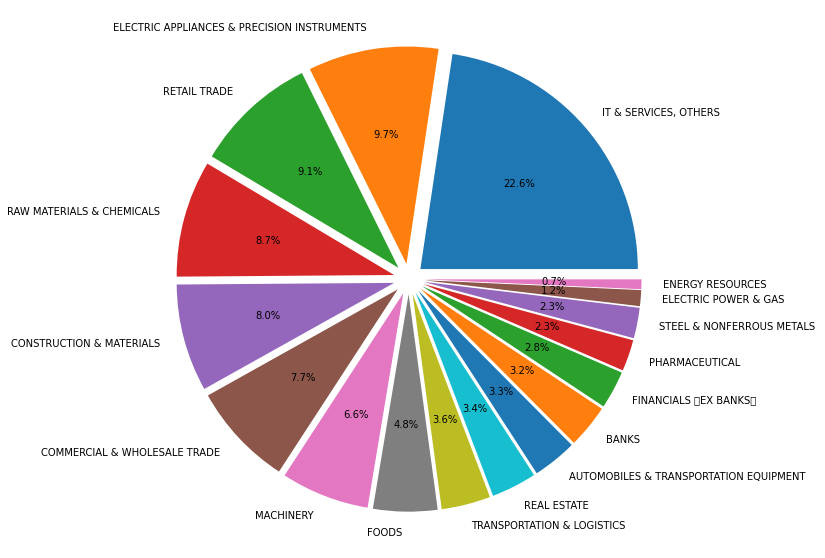

In [74]:
df['17SectorName'].value_counts().plot.pie(
    explode = [0.07 for i in range(17)],
    autopct='%1.1f%%',
    ylabel='',
    figsize=(20,10))


plt.show()

Lets have a look at the top gaining and loosing targets for the 2021-11-15 (randomly chosen).

HTML(value='<h3>Top Gaining Targets</h3>')

,Name,70_D_Close,Close,70_D_Volume,Target
SecuritiesCode,,,,,
7809,"KOTOBUKIYA CO.,LTD.",,3895.00,,0.22
4582,SymBio Pharmaceuticals Limited,,1347.00,,0.21
2158,"FRONTEO,Inc.",,2945.00,,0.20
4056,Neural Pocket Inc.,,2220.00,,0.16
2307,"CROSS CAT CO.,LTD.",,1212.00,,0.16
6627,"Tera Probe,Inc.",,2187.00,,0.13
4100,TODA KOGYO CORP.,,2872.00,,0.12
4080,TANAKA CHEMICAL CORPORATION,,1583.00,,0.12
6104,"SHIBAURA MACHINE CO.,LTD.",,3050.00,,0.12

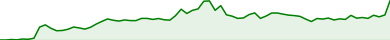
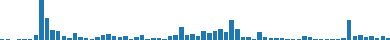
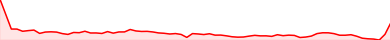
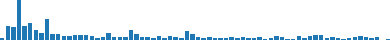
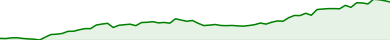
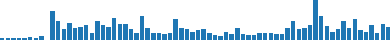
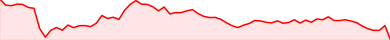
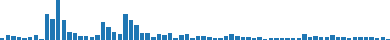
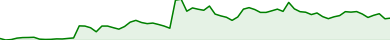
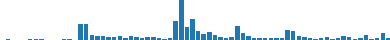
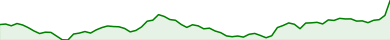
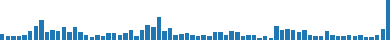
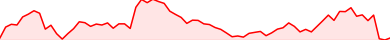
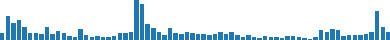
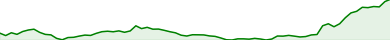
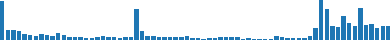
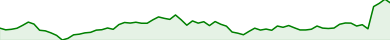
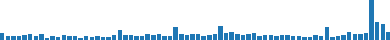
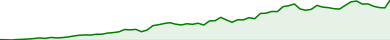
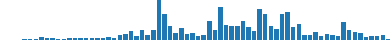

HTML(value='<h3>Top Loosing Targets</h3>')

,Name,70_D_Close,Close,70_D_Volume,Target
SecuritiesCode,,,,,
7048,VELTRA Corporation,,672.00,,-0.15
7082,"Jimoty,Inc.",,4600.00,,-0.14
4490,VisasQ Inc.,,6630.00,,-0.11
3900,CrowdWorks Inc.,,1612.00,,-0.08
4883,Modalis Therapeutics Corporation,,1008.00,,-0.08
3479,TKP Corporation,,1865.00,,-0.07
4293,"SEPTENI HOLDINGS CO.,LTD.",,541.00,,-0.06
3926,Open Door Inc.,,2503.00,,-0.06
3914,JIG-SAW INC.,,8220.00,,-0.06

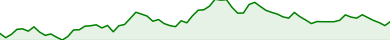
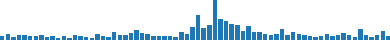
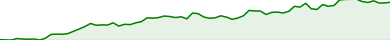
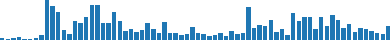
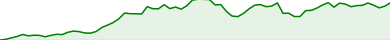
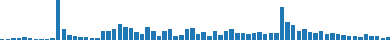
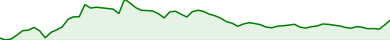
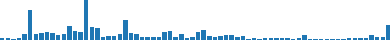
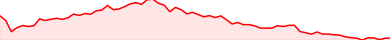
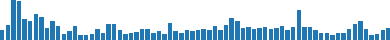
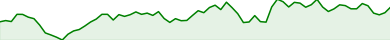
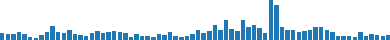
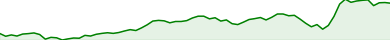
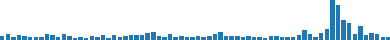
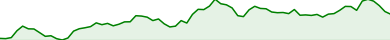
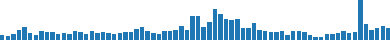
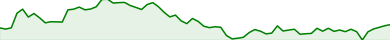
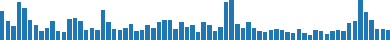
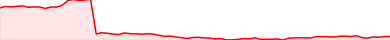
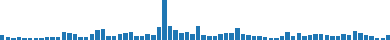

In [88]:
def sparkline(data, isBar=False, figsize=(7, 0.75), **kwargs):
    """
    creates a sparkline charts
    """
    data = list(data)
    
    *_, ax = plt.subplots(1, 1, figsize=figsize, **kwargs)
    if isBar:
        ax.bar(list(range(len(data))),data)
    else:
        c= 'green' if data[-1]> data[1] else 'red'
        ax.plot(data, color = c)
        ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1, color=c)
    ax.set_axis_off()
    plt.margins(0)

    img = BytesIO()
    plt.savefig(img, pad_inches = 0,bbox_inches= 'tight')
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

def show_table(df= df, date= '2021-11-15', sort_by= 'Target', asc= False, num_of_rows=10):
    
    # get data in between the date range
    a = df[df.index.isin(np.sort(df.index[df.index <= '2021-11-15'].unique())[-70:])]\
        .groupby('SecuritiesCode').agg(
            Name= pd.NamedAgg(column= 'Name', aggfunc='last'),
            Close= pd.NamedAgg('Close','last'),
            Target= pd.NamedAgg('Target', 'last'),
            Close_list= pd.NamedAgg('Close', pd.Series.tolist),
            Volume_list= pd.NamedAgg('Volume', pd.Series.tolist))\
        .sort_values(sort_by, ascending= asc).iloc[:num_of_rows]
    
    # add close line chart
    a['70_D_Close'] = a['Close_list'].apply(sparkline)
    
    # add volume bar chart
    a['70_D_Volume'] = a['Volume_list'].apply(lambda x: sparkline(x, isBar=True))
    
    
    return display(
        a[['Name', '70_D_Close', 'Close', '70_D_Volume', 'Target']]\
            .style.bar(subset=['Target'], align= 'zero', color= '#C0C0C0')\
            .set_properties(subset=['70_D_Close', '70_D_Volume'], **{'width': '250px'})\
            .set_properties(subset=['Name'], **{'width': '200px'})\
            .format('{:.2f}', subset= ['Close', 'Target']))


display(HTML('<h3>Top Gaining Targets</h3>'))
show_table(asc= False)

display(HTML('<h3>Top Loosing Targets</h3>'))
show_table(asc= True)

In [117]:
    a = df[df.index.isin(np.sort(df.index[df.index <= '2021-12-03'].unique())[-70:])]\
        .groupby('SecuritiesCode').agg(
            Name= pd.NamedAgg(column= 'Name', aggfunc='last'),
            Close= pd.NamedAgg('Close','last'),
            Target= pd.NamedAgg('Target', 'last'),
            Close_list= pd.NamedAgg('Close', pd.Series.tolist),
            Volume_list= pd.NamedAgg('Volume', pd.Series.tolist))\
        

In [125]:
a

,Name,Close,Target,Close_list,Volume_list
SecuritiesCode,,,,,
1301,"KYOKUYO CO.,LTD.",2982.0,0.031639,"[3020.0, 3025.0, 3020.0, ...]","[12300, 6600, 7300, ...]"
1332,"Nippon Suisan Kaisha,Ltd.",585.0,-0.056027,"[599.0, 602.0, 600.0, ...]","[1066000, 1559100, 874600, ...]"
1333,Maruha Nichiro Corporation,2358.0,0.013462,"[2464.0, 2493.0, 2494.0, ...]","[181100, 316300, 155700, ...]"
1375,"YUKIGUNI MAITAKE CO.,LTD.",1235.0,0.032680,"[1599.0, 1620.0, 1634.0, ...]","[88700, 70800, 65300, ...]"
1376,"KANEKO SEEDS CO.,LTD.",1332.0,0.032568,"[1509.0, 1496.0, 1504.0, ...]","[5800, 2700, 5100, ...]"
...,...,...,...,...,...
9990,SAC'S BAR HOLDINGS INC.,528.0,0.034816,"[541.0, 538.0, 544.0, ...]","[39000, 40400, 72900, ...]"
9991,GECOSS CORPORATION,794.0,0.025478,"[879.0, 876.0, 880.0, ...]","[17100, 18500, 11100, ...]"
9993,"YAMAZAWA CO.,LTD.",1645.0,-0.004302,"[1739.0, 1746.0, 1744.0, ...]","[12900, 4300, 15000, ...]"


In [ ]:
dfn = df\
        .drop('RowId', axis= 1).merge(
            pd.read_csv('../data/financials.csv')[['SecuritiesCode', 'Name', '33SectorName', '17SectorName', 'IssuedShares', 'MarketCapitalization', 'Section/Products']],
            on = 'SecuritiesCode', how = 'left')

dfn.set_index('Date', inplace= True)

dfn.head()


In [126]:
fin_df.head()

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.017010e+13,20170105_2659,2017-01-05,2659.0,2017-01-05,15:00:00,1.483596e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,285.05,NaN,False,True,False,False,False,31981654.0,18257,31963405.0
4,2.017011e+13,20170105_3050,2017-01-05,3050.0,2017-01-05,15:30:00,1.483598e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
fin_df.shape

(92956, 45)